# NECESSARY IMPORTS


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq

In [ ]:
%%capture
!pip install arch
from arch import arch_model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [ ]:
%%capture
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# DATA LOADING

In [ ]:
!gdown 1nhyP5KkTsu-TqgNjlY_fGt6Y3loFj_b3

Downloading...
From: https://drive.google.com/uc?id=1nhyP5KkTsu-TqgNjlY_fGt6Y3loFj_b3
To: /content/full-year-load-data.csv
100% 1.06M/1.06M [00:00<00:00, 86.3MB/s]


In [ ]:
data = pd.read_csv('/content/full-year-load-data.csv')

In [ ]:
data.head()

,date_column,value
0,2022-04-01 00:00:00,51.78
1,2022-04-01 00:15:00,46.16
2,2022-04-01 00:30:00,42.42
3,2022-04-01 00:45:00,44.33
4,2022-04-01 01:00:00,49.67


In [ ]:
# Converting the 'date_column' to datetime format
data['date_column'] = pd.to_datetime(data['date_column'], format='%Y-%m-%d %H:%M:%S')
# Setting the 'date_column' as the index
data.set_index('date_column', inplace=True)
data.head()

,value
date_column,
2022-04-01 00:00:00,51.78
2022-04-01 00:15:00,46.16
2022-04-01 00:30:00,42.42
2022-04-01 00:45:00,44.33
2022-04-01 01:00:00,49.67


# TRAIN AND TEST SPLIT

In [ ]:
print(data.shape)
train=data.iloc[:-2880]
test=data.iloc[-2880:]
print(train.shape,test.shape)

(37920, 1)
(35040, 1) (2880, 1)


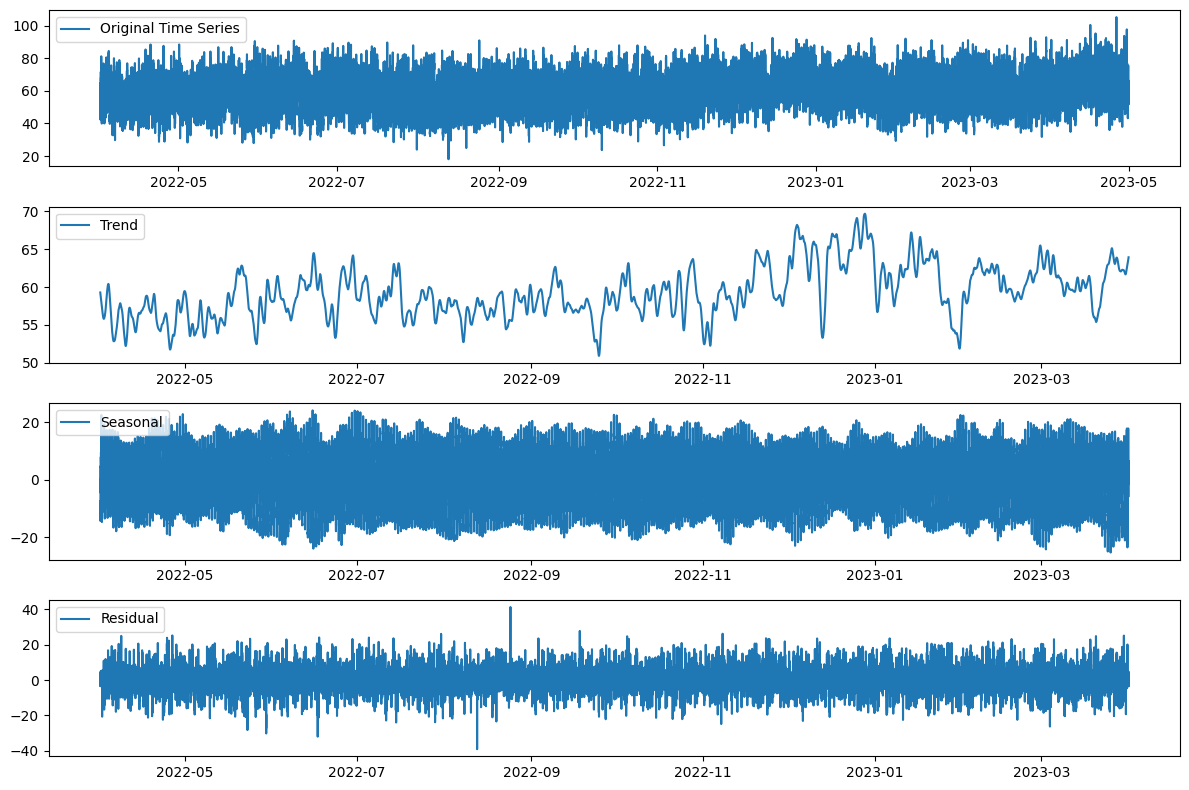

In [ ]:
# Decompose the time series using STL
from statsmodels.tsa.seasonal import STL

stl = STL(train, period=96, robust=True)
result = stl.fit()
seasonal = result.seasonal
trend = result.trend
residual = result.resid

# Plot the decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data, label='Original Time Series')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
stl1 = STL(trend, period=96, robust=True)
result1 = stl1.fit()
seasonal1 = result1.seasonal
trend1 = result1.trend
residual1 = result1.resid

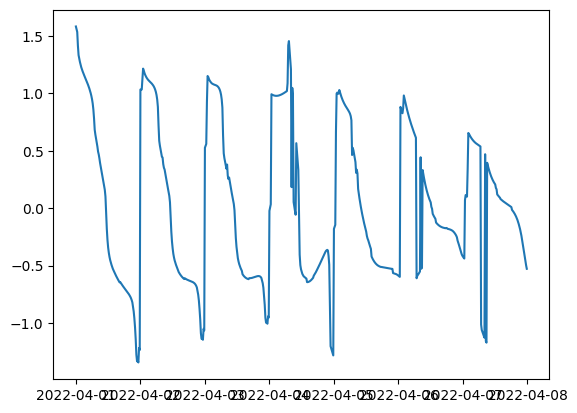

In [ ]:
plt.plot(seasonal1[:672])

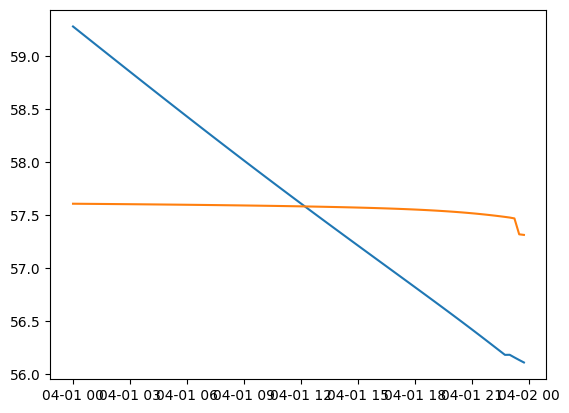

In [ ]:
plt.plot(trend[:96])
plt.plot(trend1[:96])
plt.show()

In [ ]:
train.head()

,value
date_column,
2022-04-01 00:00:00,51.78
2022-04-01 00:15:00,46.16
2022-04-01 00:30:00,42.42
2022-04-01 00:45:00,44.33
2022-04-01 01:00:00,49.67


In [ ]:
test.head()

,value
date_column,
2023-04-01 00:00:00,70.7704
2023-04-01 00:15:00,65.8452
2023-04-01 00:30:00,69.4828
2023-04-01 00:45:00,64.2864
2023-04-01 01:00:00,72.9272


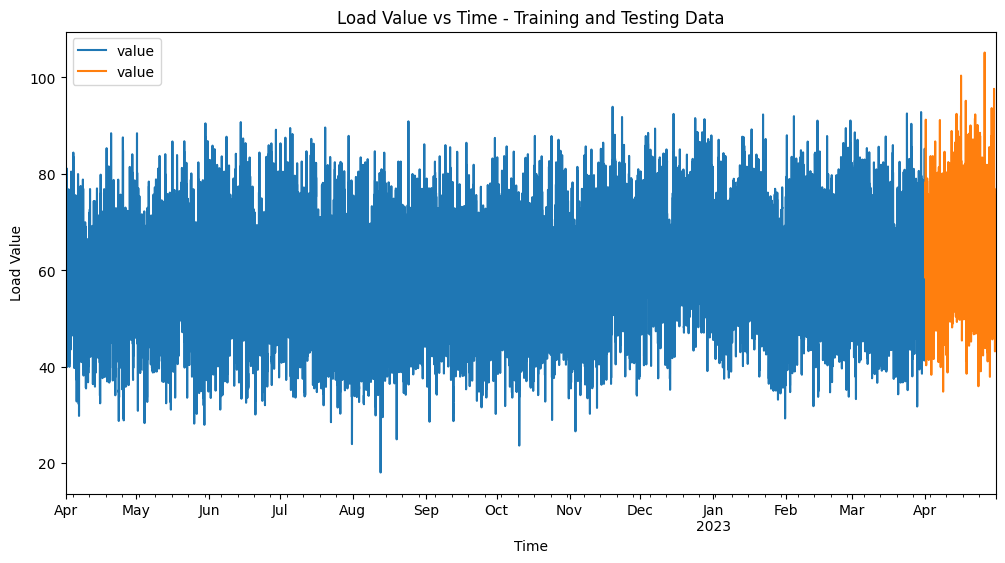

In [ ]:
fig, ax=plt.subplots(figsize=(12, 6))
train.plot(ax=ax, label='train')
test.plot(ax=ax, label='test')
ax.set_title('Load Value vs Time - Training and Testing Data')
ax.set_xlabel('Time')
ax.set_ylabel('Load Value')
ax.legend();

# New Section

In [ ]:
squared_df = train ** 2

In [ ]:
squared_df.head()

,value
date_column,
2022-04-01 00:00:00,2681.1684
2022-04-01 00:15:00,2130.7456
2022-04-01 00:30:00,1799.4564
2022-04-01 00:45:00,1965.1489
2022-04-01 01:00:00,2467.1089


<Figure size 1200x600 with 0 Axes>

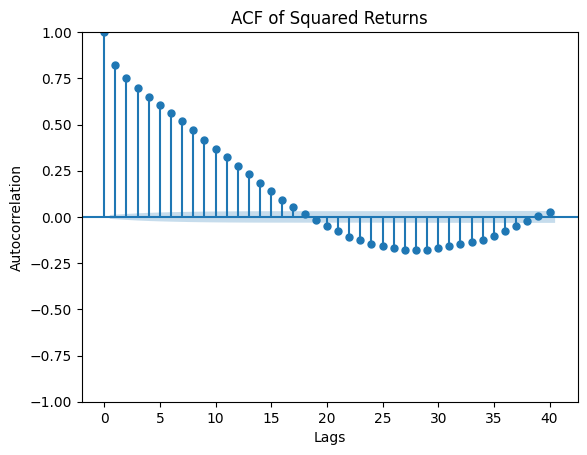

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(squared_df, lags=40)
plt.title('ACF of Squared Returns')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [ ]:
# Fit a GARCH model
garch_model = arch_model(train, vol='Garch', p=1, q=1)
garch_result = garch_model.fit()
print("GARCH Model Summary:")
print(garch_result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 773237500393.789
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1028276235.4381654
Iteration:      3,   Func. Count:     20,   Neg. LLF: 133961.78437577034
Iteration:      4,   Func. Count:     26,   Neg. LLF: 126863.84841564493
Iteration:      5,   Func. Count:     33,   Neg. LLF: 126758.7638089079
Iteration:      6,   Func. Count:     39,   Neg. LLF: 125806.87164191001
Iteration:      7,   Func. Count:     45,   Neg. LLF: 125752.81193193088
Iteration:      8,   Func. Count:     50,   Neg. LLF: 125749.34278052075
Iteration:      9,   Func. Count:     55,   Neg. LLF: 125749.2682653878
Iteration:     10,   Func. Count:     60,   Neg. LLF: 125749.2618785805
Iteration:     11,   Func. Count:     65,   Neg. LLF: 125749.26148940925
Iteration:     12,   Func. Count:     70,   Neg. LLF: 125749.26147166884
Iteration:     13,   Func. Count:     74,   Neg. LLF: 125749.2614716688
Optimization terminated successfully    (Exit mode 0)
   

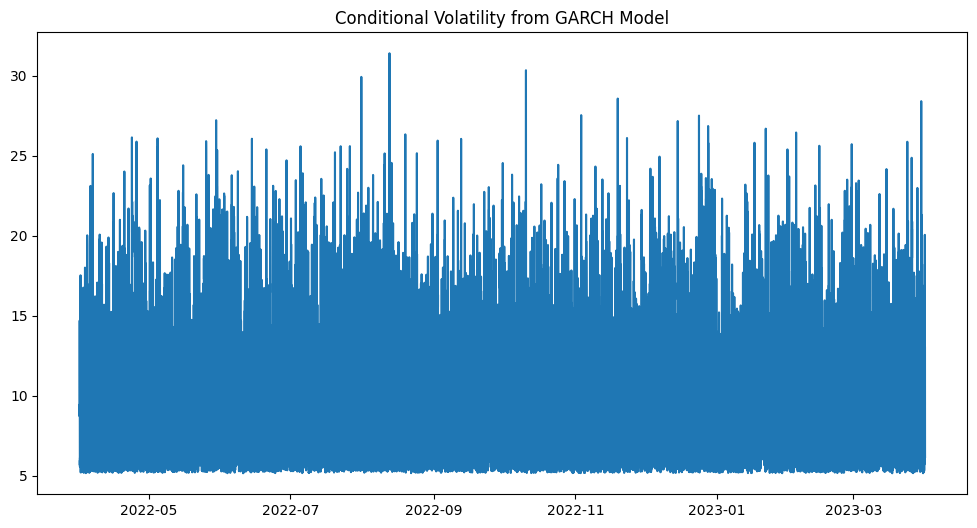

In [ ]:
# Plot the conditional volatility from the GARCH model
plt.figure(figsize=(12, 6))
plt.plot(garch_result.conditional_volatility)
plt.title('Conditional Volatility from GARCH Model')
plt.show()

# FEATURE EXPLORATION

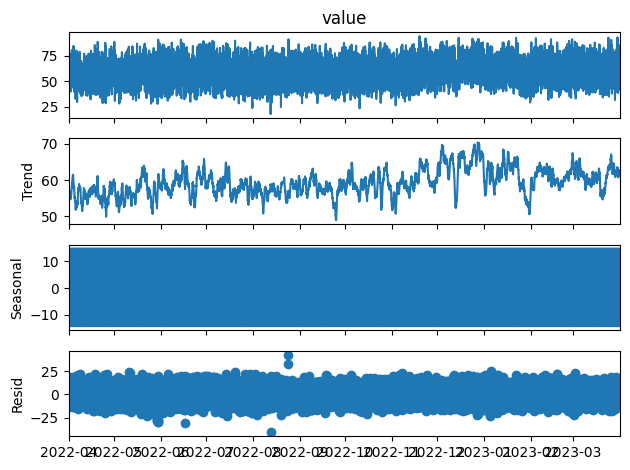

In [ ]:
result = seasonal_decompose(train['value'], model='additive', period=96, extrapolate_trend='freq')
result.plot()
plt.show()

We are not able to check any clear patterns here, so sacling down our dataset, for observation purpose.

In [ ]:
subdf = train.iloc[:672]
subdf

,value
date_column,
2022-04-01 00:00:00,51.78
2022-04-01 00:15:00,46.16
2022-04-01 00:30:00,42.42
2022-04-01 00:45:00,44.33
2022-04-01 01:00:00,49.67
...,...
2022-04-07 22:45:00,52.34
2022-04-07 23:00:00,58.62
2022-04-07 23:15:00,63.05


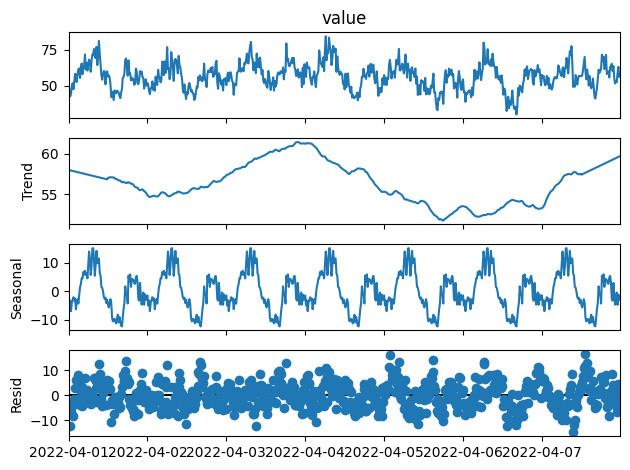

In [ ]:
result_week = seasonal_decompose(subdf['value'], model='additive', period=96, extrapolate_trend='freq')
result_week.plot()
plt.show()

We do see an observable trend component in the series, even though its less and not strictly monotonic, but it is present.

Also we observe a repeating seasonal pattern in time series, we will look into the period of seasonality later.

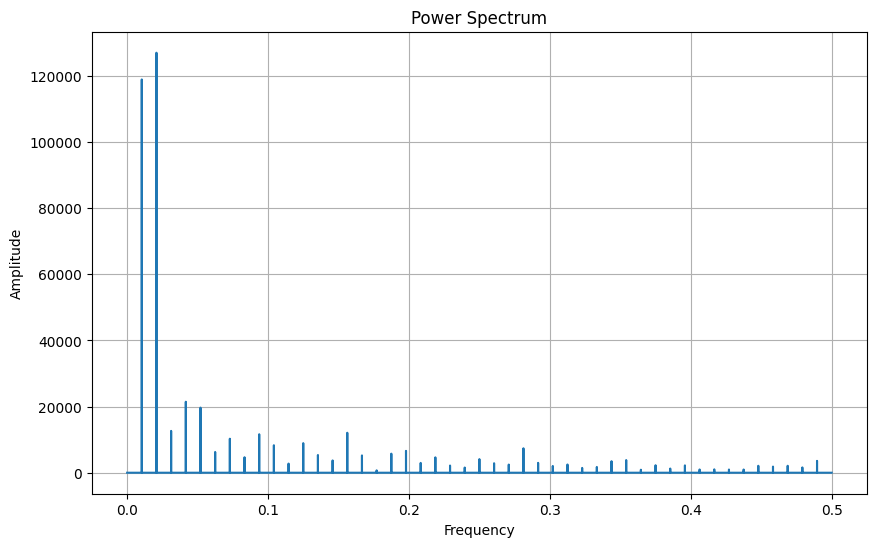

Dominant Frequency: 0.020833333333333332
Inferred Seasonal Period: 48 time units


In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np

# Compute Fourier transform
n = len(result.seasonal)
freq = fftfreq(n)
mask = freq > 0  # Use only positive frequencies (since time series is real-valued)

# Ensure the array is aligned
aligned_seasonal = np.ascontiguousarray(result.seasonal)  # Create a contiguous and aligned copy

fft_vals = fft(aligned_seasonal)  # Use the aligned array
fft_abs = np.abs(fft_vals[mask])
fft_freq = freq[mask]

# Plot the power spectrum
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, fft_abs)
plt.title('Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Find dominant frequency (seasonal period)
dominant_freq = fft_freq[np.argmax(fft_abs)]
seasonal_period = int(np.round(1 / dominant_freq))
print(f"Dominant Frequency: {dominant_freq}")
print(f"Inferred Seasonal Period: {seasonal_period} time units")

Spectral Analysis gives clear indication of the seasonal component and its period. Result shows 48 time units (48*15 mins = 12hrs) is the seasonal period.

In [ ]:
trend = pd.DataFrame(result.trend)
trend

,trend
date_column,
2022-04-01 00:00:00,58.026842
2022-04-01 00:15:00,58.002180
2022-04-01 00:30:00,57.977517
2022-04-01 00:45:00,57.952855
2022-04-01 01:00:00,57.928192
...,...
2023-03-31 22:45:00,61.798685
2023-03-31 23:00:00,61.797198
2023-03-31 23:15:00,61.795711


In [ ]:
seasonal = pd.DataFrame(result.seasonal)
seasonal

,seasonal
date_column,
2022-04-01 00:00:00,-1.101014
2022-04-01 00:15:00,-1.985854
2022-04-01 00:30:00,-1.794775
2022-04-01 00:45:00,-2.495004
2022-04-01 01:00:00,-1.233645
...,...
2023-03-31 22:45:00,2.324955
2023-03-31 23:00:00,0.683330
2023-03-31 23:15:00,0.673497


In [ ]:
resid = pd.DataFrame(result.resid)
resid

,resid
date_column,
2022-04-01 00:00:00,-5.145828
2022-04-01 00:15:00,-9.856325
2022-04-01 00:30:00,-13.762742
2022-04-01 00:45:00,-11.127850
2022-04-01 01:00:00,-7.024547
...,...
2023-03-31 22:45:00,3.853559
2023-03-31 23:00:00,3.741072
2023-03-31 23:15:00,-0.747608


In [ ]:
df = train.copy()

In [ ]:
from scipy import signal

# detrend= signal.detrend(df.value)
# df = df.assign(value=detrend)
# df.head()

,value
date_column,
2022-04-01 00:00:00,-4.492508
2022-04-01 00:15:00,-10.112680
2022-04-01 00:30:00,-13.852853
2022-04-01 00:45:00,-11.943025
2022-04-01 01:00:00,-6.603198


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(resid['resid'])

NameError: name 'resid' is not defined

Based upon the significance level of 0.05 and the p-value of ADF test, the null hypothesis can be rejected. Hence, the series is stationary.

In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(resid['resid'])

Results of KPSS Test:
Test Statistic            0.002355
p-value                   0.100000
Lags Used                77.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-24-e9ccfa4903ab>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


Since the p-value is more than the commonly used significance level of 0.05, we do not reject the null hypothesis of stationarity. This indicates that the time series is likely stationary.

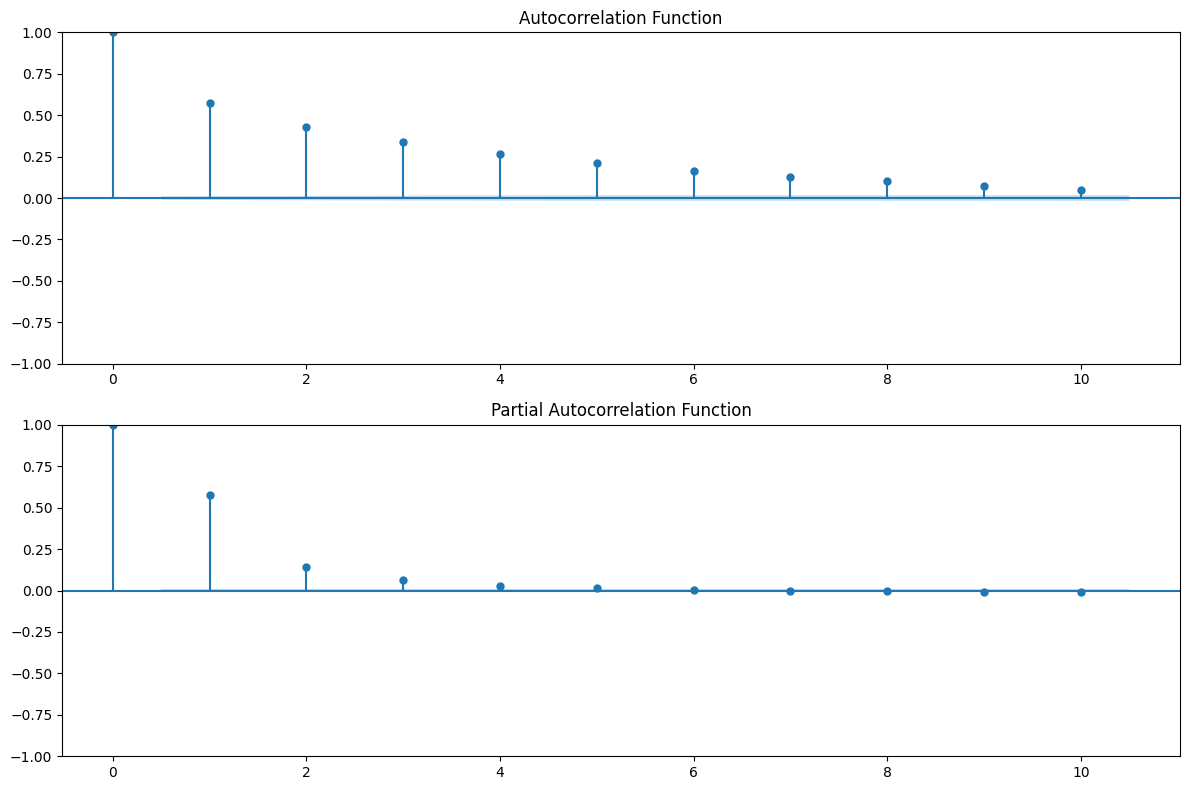

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF with confidence intervals
plot_acf(resid['resid'], lags=10, alpha=0.05, ax=axes[0])
axes[0].set_title('Autocorrelation Function')

# Plot PACF with confidence intervals
plot_pacf(resid['resid'], lags=10, alpha=0.05, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [ ]:
adf_test(seasonal['seasonal'])

Results of Dickey-Fuller Test:
Test Statistic                   -54.261965
p-value                            0.000000
Lags Used                         52.000000
Number of Observations Used    34987.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861623
Critical Value (10%)              -2.566814
dtype: float64


In [ ]:
kpss_test(seasonal['seasonal'])

Results of KPSS Test:
Test Statistic             0.010713
p-value                    0.100000
Lags Used                102.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


<ipython-input-24-e9ccfa4903ab>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


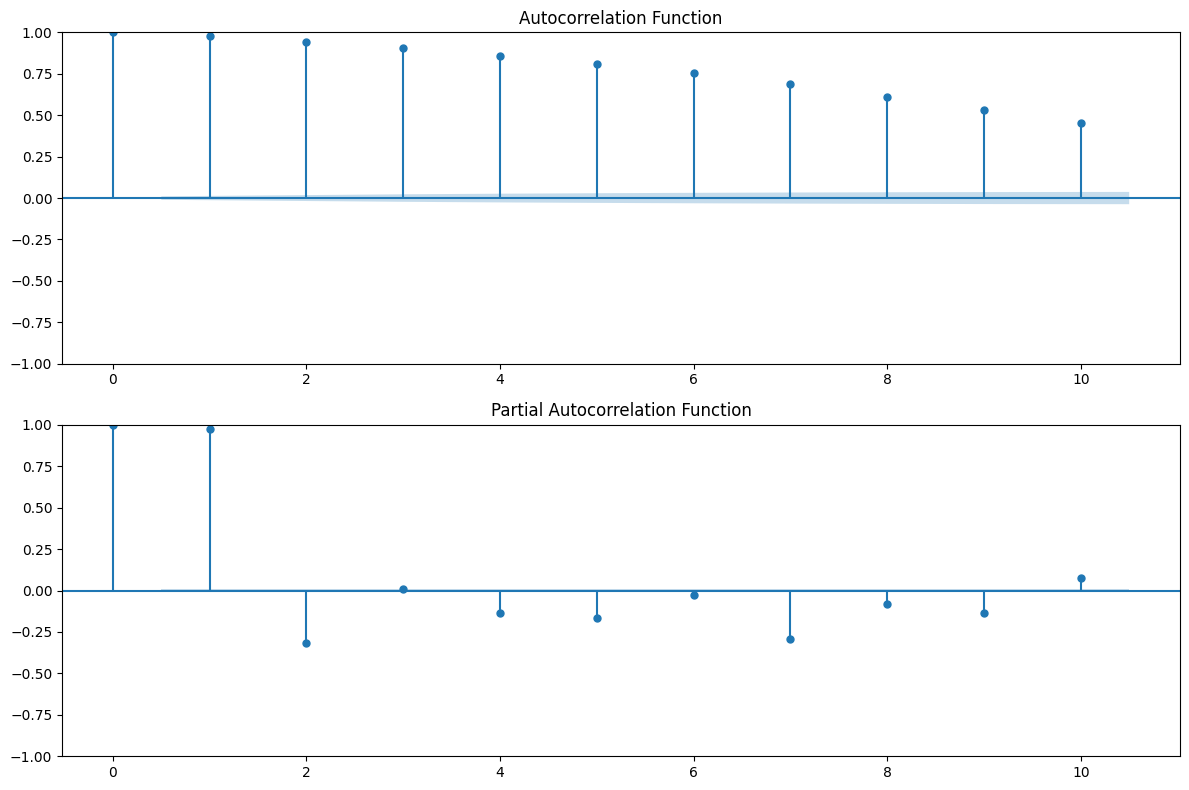

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF with confidence intervals
plot_acf(seasonal['seasonal'], lags=10, alpha=0.05, ax=axes[0])
axes[0].set_title('Autocorrelation Function')

# Plot PACF with confidence intervals
plot_pacf(seasonal['seasonal'], lags=10, alpha=0.05, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


# SARIMAX 1, 1, 1

In [ ]:
# Example SARIMA model specification
order = (1, 1, 1)  # Example non-seasonal (p, d, q) parameters
seasonal_order = (1, 1, 1, 48)  # Example seasonal (P, D, Q, m) parameters

# Fit SARIMA model
model = sm.tsa.SARIMAX(train['value'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


In [ ]:
results.summary()

In [ ]:
forecast=results.forecast(steps=2880)
forecast

2023-04-01 00:00:00    60.667028
2023-04-01 00:15:00    59.724047
2023-04-01 00:30:00    61.279832
2023-04-01 00:45:00    60.833848
2023-04-01 01:00:00    61.199283
                         ...    
2023-04-30 22:45:00    70.014846
2023-04-30 23:00:00    68.628967
2023-04-30 23:15:00    68.146785
2023-04-30 23:30:00    66.428153
2023-04-30 23:45:00    64.710636
Freq: 15T, Name: predicted_mean, Length: 2880, dtype: float64

In [ ]:
test

,value
date_column,
2023-04-01 00:00:00,70.7704
2023-04-01 00:15:00,65.8452
2023-04-01 00:30:00,69.4828
2023-04-01 00:45:00,64.2864
2023-04-01 01:00:00,72.9272
...,...
2023-04-30 22:45:00,66.2712
2023-04-30 23:00:00,57.2260
2023-04-30 23:15:00,53.8600


In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['value'], forecast))
rmse

8.69025025696684

# ARIMA on RESIDS

In [ ]:
model = sm.tsa.arima.ARIMA(resid['resid'], order=(3,1,3))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                35040
Model:                 ARIMA(3, 1, 3)   Log Likelihood             -105995.002
Date:                Sat, 22 Jun 2024   AIC                         212004.005
Time:                        06:52:42   BIC                         212063.254
Sample:                    04-01-2022   HQIC                        212022.876
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0088      1.552      0.006      0.995      -3.032       3.050
ar.L2          0.7489      1.454      0.515      0.606      -2.100       3.598
ar.L3         -0.0987      0.175     -0.565      0.572      -0.441       0.244
ma.L1         -0.5276      1.551     -0.340      0.734      -3.568       2.513
ma.L2         -0.8857      2.257     -0.392      0.695      -5.310       3.539
ma.L3          0.4133      0.707      0.585      0.559      -0.972       1.798
sigma2        24.8347      0.186    133.486      0.000      24.470      25.199
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               178.84
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.09
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast=model.forecast(steps=2880)
forecast

2023-04-01 00:00:00   -0.425943
2023-04-01 00:15:00   -0.270278
2023-04-01 00:30:00   -0.205196
2023-04-01 00:45:00   -0.160601
2023-04-01 01:00:00   -0.126832
                         ...   
2023-04-30 22:45:00    0.004625
2023-04-30 23:00:00    0.004625
2023-04-30 23:15:00    0.004625
2023-04-30 23:30:00    0.004625
2023-04-30 23:45:00    0.004625
Freq: 15T, Name: predicted_mean, Length: 2880, dtype: float64

In [ ]:
fore = pd.DataFrame(forecast)
fore

,predicted_mean
2023-04-01 00:00:00,-0.425943
2023-04-01 00:15:00,-0.270278
2023-04-01 00:30:00,-0.205196
2023-04-01 00:45:00,-0.160601
2023-04-01 01:00:00,-0.126832
...,...
2023-04-30 22:45:00,0.004625
2023-04-30 23:00:00,0.004625
2023-04-30 23:15:00,0.004625
2023-04-30 23:30:00,0.004625


In [ ]:
result1 = seasonal_decompose(test['value'], model='additive', period=96, extrapolate_trend='freq')

In [ ]:
trend1 = pd.DataFrame(result1.trend)
trend1

,trend
date_column,
2023-04-01 00:00:00,63.326881
2023-04-01 00:15:00,63.308086
2023-04-01 00:30:00,63.289291
2023-04-01 00:45:00,63.270497
2023-04-01 01:00:00,63.251702
...,...
2023-04-30 22:45:00,63.705385
2023-04-30 23:00:00,63.710622
2023-04-30 23:15:00,63.715858


In [ ]:
seasonal_cycle = result.seasonal[:96]
seasonal_forecast = pd.Series(np.tile(seasonal_cycle, 2880//96 + 1)[:2880], index=fore.index)
seasonal_forecast = pd.DataFrame(seasonal_forecast)
seasonal_forecast.rename(columns={0: 'seasonal'}, inplace=True)
seasonal_forecast

,seasonal
2023-04-01 00:00:00,-1.101014
2023-04-01 00:15:00,-1.985854
2023-04-01 00:30:00,-1.794775
2023-04-01 00:45:00,-2.495004
2023-04-01 01:00:00,-1.233645
...,...
2023-04-30 22:45:00,2.324955
2023-04-30 23:00:00,0.683330
2023-04-30 23:15:00,0.673497
2023-04-30 23:30:00,1.553172


In [ ]:
season1 = pd.DataFrame(result1.seasonal)
season1

,seasonal
date_column,
2023-04-01 00:00:00,-2.183026
2023-04-01 00:15:00,-6.010796
2023-04-01 00:30:00,-2.875539
2023-04-01 00:45:00,-2.615484
2023-04-01 01:00:00,-0.488768
...,...
2023-04-30 22:45:00,-0.972194
2023-04-30 23:00:00,-0.018872
2023-04-30 23:15:00,-1.298191


In [ ]:
combined_df = pd.concat([trend1, seasonal_forecast,fore], axis=1).sum(axis=1)

In [ ]:
combined_df = pd.DataFrame(combined_df)
combined_df

,0
2023-04-01 00:00:00,61.799923
2023-04-01 00:15:00,61.051953
2023-04-01 00:30:00,61.289320
2023-04-01 00:45:00,60.614891
2023-04-01 01:00:00,61.891225
...,...
2023-04-30 22:45:00,66.034965
2023-04-30 23:00:00,64.398577
2023-04-30 23:15:00,64.393980
2023-04-30 23:30:00,65.278892


In [ ]:
combined_df.rename(columns={0: 'forecast'}, inplace=True)
combined_df

,forecast
2023-04-01 00:00:00,61.799923
2023-04-01 00:15:00,61.051953
2023-04-01 00:30:00,61.289320
2023-04-01 00:45:00,60.614891
2023-04-01 01:00:00,61.891225
...,...
2023-04-30 22:45:00,66.034965
2023-04-30 23:00:00,64.398577
2023-04-30 23:15:00,64.393980
2023-04-30 23:30:00,65.278892


In [ ]:
def plot_forecast(test,forecast):
  plt.figure(figsize=(10, 6))

  plt.plot(test.index, test['value'], label='Original Values')
  plt.plot(forecast.index, forecast['forecast'], label='Forecast Values')

  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.title('original and forecasted Time Series')
  plt.legend()
   # Show legend based on 'label' values

  # Display the plot
  plt.grid(True)  # Optional: add grid
  plt.tight_layout()  # Optional: improve spacing
  plt.show()

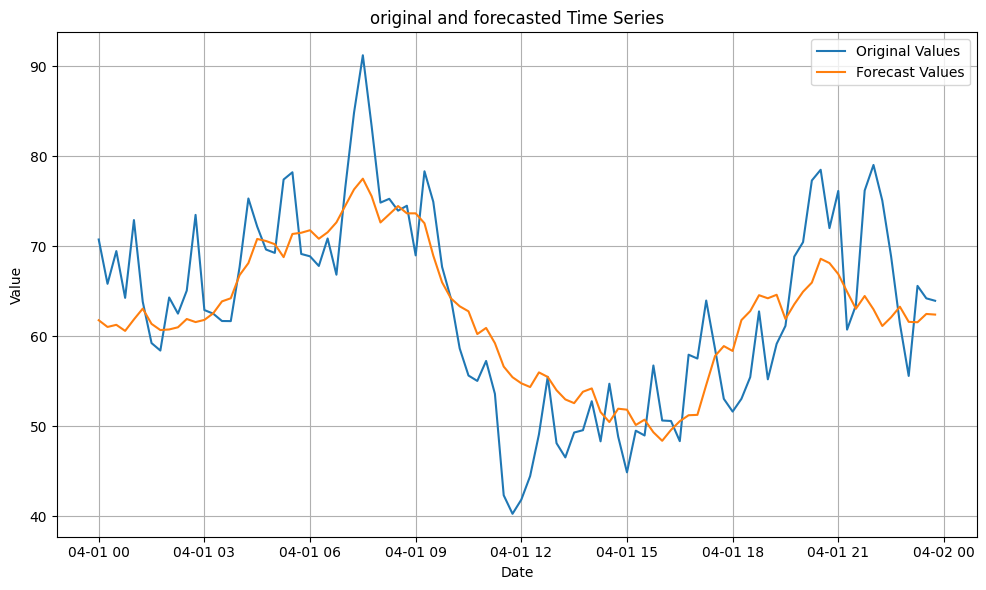

In [ ]:
plot_forecast(test.iloc[:96],combined_df.iloc[:96])

In [ ]:
mape = np.mean(np.abs((test.value - combined_df.forecast) / test.value)) * 100
mape

7.848865312980055

In [ ]:
arima_resid = model.resid
arima_resid

date_column
2022-04-01 00:00:00   -5.145828
2022-04-01 00:15:00   -4.710552
2022-04-01 00:30:00   -5.440856
2022-04-01 00:45:00    0.209252
2022-04-01 01:00:00    3.613302
                         ...   
2023-03-31 22:45:00   -2.045554
2023-03-31 23:00:00    0.553278
2023-03-31 23:15:00   -3.564102
2023-03-31 23:30:00   -0.559884
2023-03-31 23:45:00   -1.441903
Length: 35040, dtype: float64

In [ ]:
def garch_on_resid(resid,p,q):
  model=arch_model(resid,p=p,q=q)
  model_fit=model.fit()
  print(model_fit.summary())
  garch_forecast=model_fit.forecast(horizon=2880)
  garch_forecast_variance=garch_forecast.variance.values[-1,:]
  return garch_forecast_variance

In [ ]:
garch_forecast_variance=garch_on_resid(arima_resid,3,3)

Iteration:      1,   Func. Count:     10,   Neg. LLF: 122562.94123124614
Iteration:      2,   Func. Count:     22,   Neg. LLF: 189695.81627467443
Iteration:      3,   Func. Count:     35,   Neg. LLF: 106223.18590554962
Iteration:      4,   Func. Count:     46,   Neg. LLF: 105985.83376605382
Iteration:      5,   Func. Count:     56,   Neg. LLF: 106018.98153653683
Iteration:      6,   Func. Count:     67,   Neg. LLF: 105979.88005278657
Iteration:      7,   Func. Count:     77,   Neg. LLF: 108363.32639838396
Iteration:      8,   Func. Count:     87,   Neg. LLF: 105962.12275343442
Iteration:      9,   Func. Count:     97,   Neg. LLF: 105961.44637022504
Iteration:     10,   Func. Count:    106,   Neg. LLF: 105964.05130970557
Iteration:     11,   Func. Count:    116,   Neg. LLF: 105961.29746991843
Iteration:     12,   Func. Count:    125,   Neg. LLF: 105961.29308080352
Iteration:     13,   Func. Count:    134,   Neg. LLF: 105961.29115707523
Iteration:     14,   Func. Count:    143,   Neg. LL

In [ ]:
final_forecast = combined_df.forecast + np.sqrt(garch_forecast_variance)*np.random.normal(size=2880)
final_forecast = pd.DataFrame(final_forecast,index=test.index)
final_forecast.columns=['forecast']
final_forecast

,forecast
date_column,
2023-04-01 00:00:00,58.414849
2023-04-01 00:15:00,58.603195
2023-04-01 00:30:00,66.809653
2023-04-01 00:45:00,56.399858
2023-04-01 01:00:00,64.793533
...,...
2023-04-30 22:45:00,72.148620
2023-04-30 23:00:00,69.891432
2023-04-30 23:15:00,65.647049


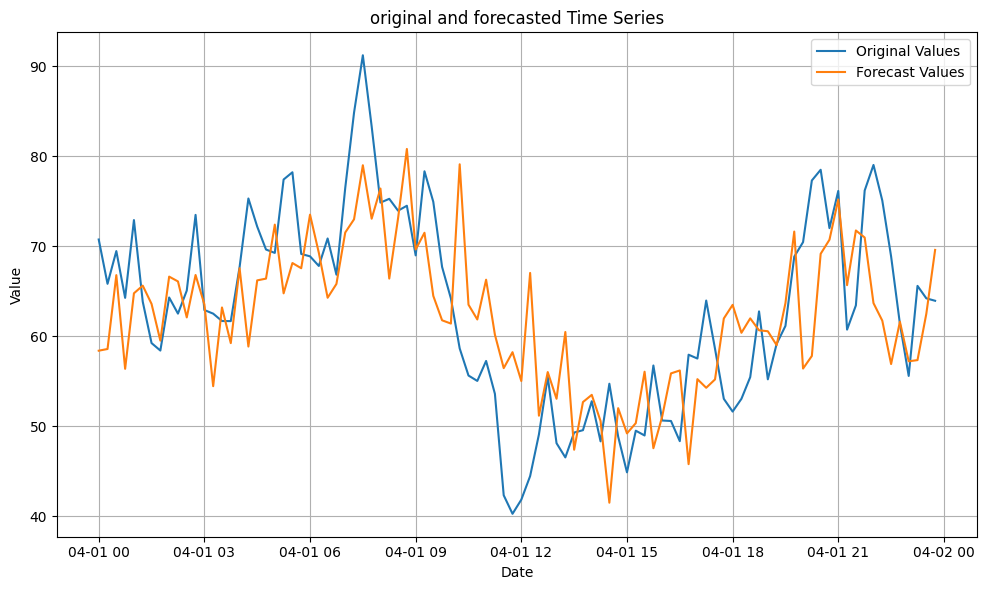

In [ ]:
plot_forecast(test.iloc[:96],final_forecast.iloc[:96])

In [ ]:
mape = np.mean(np.abs((test.value - combined_df.forecast) / test.value)) * 100
mape

7.848865312980055

Now both tests are in favour of data being stationary.


In [ ]:
# !pip install pmdarima

In [ ]:
# from pmdarima import auto_arima

# stepwise_fit = auto_arima(data.value, trace=True,
# suppress_warnings=True)

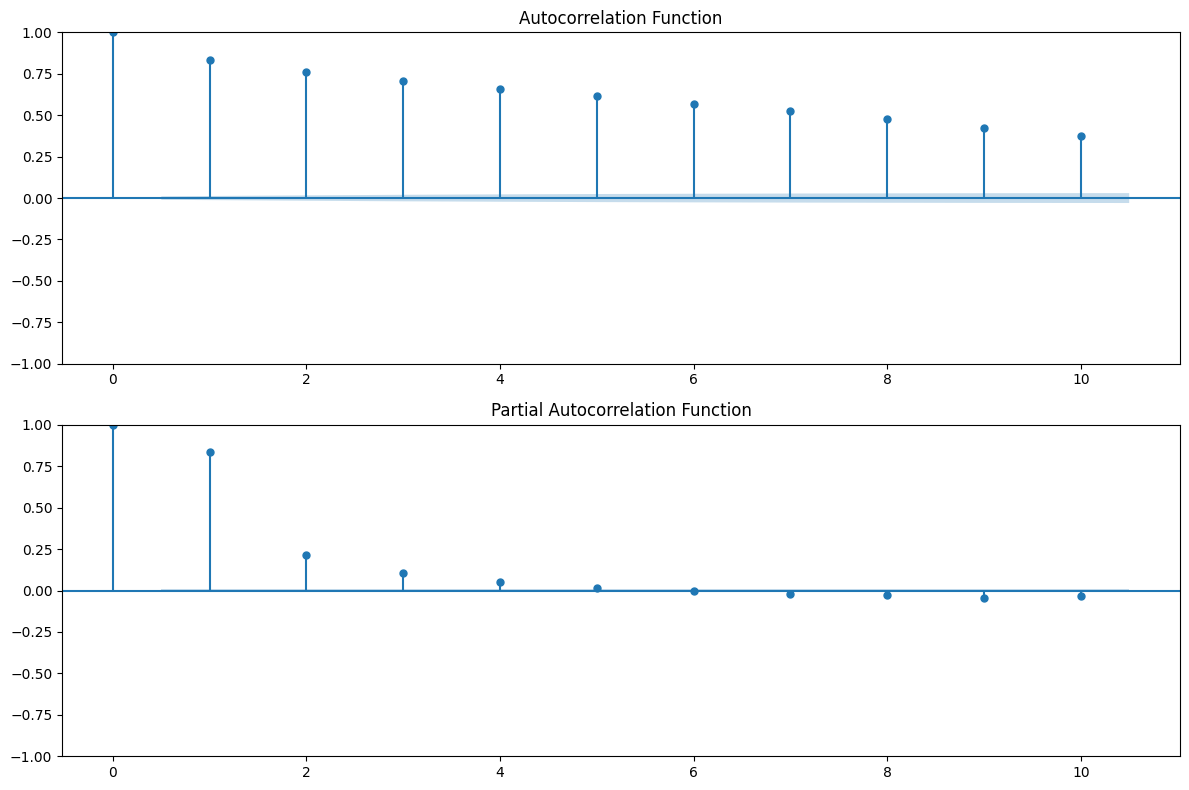

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF with confidence intervals
plot_acf(train['value'], lags=10, alpha=0.05, ax=axes[0])
axes[0].set_title('Autocorrelation Function')

# Plot PACF with confidence intervals
plot_pacf(train['value'], lags=10, alpha=0.05, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


ACF and PACF for the differenced series is below.


In [ ]:
train_1

,value
date_column,
2022-04-01 00:15:00,-5.6200
2022-04-01 00:30:00,-3.7400
2022-04-01 00:45:00,1.9100
2022-04-01 01:00:00,5.3400
2022-04-01 01:15:00,1.9800
...,...
2023-03-31 22:45:00,-7.2760
2023-03-31 23:00:00,-1.7556
2023-03-31 23:15:00,-4.5000


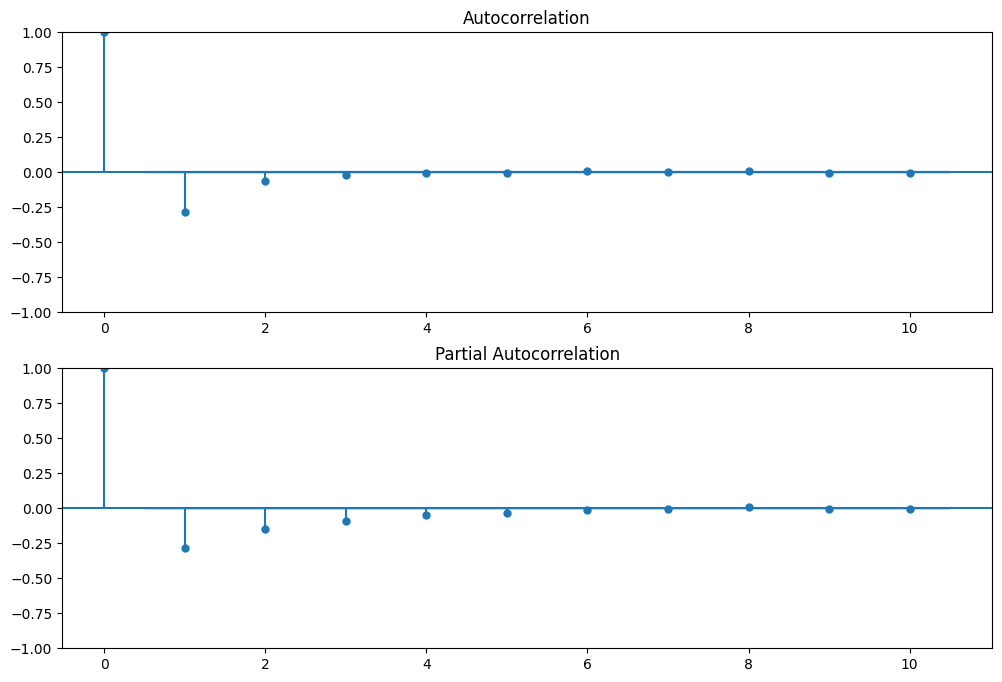

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_1['value'],lags=10, alpha=0.05,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_1['value'],lags=10, alpha=0.05,ax=ax2)

In [ ]:
train_1

,value
date_column,
2022-04-01 00:15:00,-5.6200
2022-04-01 00:30:00,-3.7400
2022-04-01 00:45:00,1.9100
2022-04-01 01:00:00,5.3400
2022-04-01 01:15:00,1.9800
...,...
2023-03-31 22:45:00,-7.2760
2023-03-31 23:00:00,-1.7556
2023-03-31 23:15:00,-4.5000


In [ ]:
model = sm.tsa.arima.ARIMA(df['value'], order=(1,0,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -106011.254
Date:                Thu, 20 Jun 2024   AIC                         212030.509
Time:                        11:53:32   BIC                         212064.366
Sample:                    04-01-2022   HQIC                        212041.292
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.079      0.020      0.984      -0.154       0.157
ar.L1          0.7593      0.006    136.133      0.000       0.748       0.770
ma.L1         -0.2842      0.008    -34.810      0.000      -0.300      -0.268
sigma2        24.8542      0.175    141.730      0.000      24.510      25.198
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):               177.10
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.09
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast=model.forecast(steps=2880)
forecast

2023-04-01 00:00:00   -0.523080
2023-04-01 00:15:00   -0.396771
2023-04-01 00:30:00   -0.300870
2023-04-01 00:45:00   -0.228055
2023-04-01 01:00:00   -0.172769
                         ...   
2023-04-30 22:45:00    0.001602
2023-04-30 23:00:00    0.001602
2023-04-30 23:15:00    0.001602
2023-04-30 23:30:00    0.001602
2023-04-30 23:45:00    0.001602
Freq: 15T, Name: predicted_mean, Length: 2880, dtype: float64

In [ ]:
model1 = sm.tsa.arima.ARIMA(train_1['value'], order=(2,0,2))
model1=model1.fit()
model1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35039
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -109780.101
Date:                Tue, 11 Jun 2024   AIC                         219572.202
Time:                        18:49:46   BIC                         219622.987
Sample:                    04-01-2022   HQIC                        219588.377
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.017      0.025      0.980      -0.032       0.033
ar.L1         -0.1266      2.382     -0.053      0.958      -4.795       4.542
ar.L2          0.0796      0.515      0.155      0.877      -0.930       1.089
ma.L1         -0.2183      2.382     -0.092      0.927      -4.888       4.451
ma.L2         -0.1970      1.337     -0.147      0.883      -2.818       2.424
sigma2        30.8238      0.219    140.514      0.000      30.394      31.254
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               104.73
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast=model1.forecast(steps=2880)
forecast

2023-04-01 00:00:00    0.737426
2023-04-01 00:15:00    0.157231
2023-04-01 00:30:00    0.039256
2023-04-01 00:45:00    0.007986
2023-04-01 01:00:00    0.002550
                         ...   
2023-04-30 22:45:00    0.000415
2023-04-30 23:00:00    0.000415
2023-04-30 23:15:00    0.000415
2023-04-30 23:30:00    0.000415
2023-04-30 23:45:00    0.000415
Freq: 15T, Name: predicted_mean, Length: 2880, dtype: float64

In [ ]:
model = sm.tsa.arima.ARIMA(train['value'], order=(1,1,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(1, 1, 0)   Log Likelihood             -110382.526
Date:                Tue, 11 Jun 2024   AIC                         220769.052
Time:                        18:24:27   BIC                         220785.980
Sample:                    04-01-2022   HQIC                        220774.443
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2825      0.005    -57.792      0.000      -0.292      -0.273
sigma2        31.9022      0.224    142.104      0.000      31.462      32.342
===================================================================================
Ljung-Box (L1) (Q):                  63.99   Jarque-Bera (JB):               136.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.00
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = sm.tsa.arima.ARIMA(train['value'], order=(0,1,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(0, 1, 1)   Log Likelihood             -109904.238
Date:                Tue, 11 Jun 2024   AIC                         219812.477
Time:                        18:24:47   BIC                         219829.405
Sample:                    04-01-2022   HQIC                        219817.869
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3738      0.005    -79.257      0.000      -0.383      -0.365
sigma2        31.0428      0.220    140.996      0.000      30.611      31.474
===================================================================================
Ljung-Box (L1) (Q):                  32.91   Jarque-Bera (JB):               110.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.02
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = sm.tsa.arima.ARIMA(train['value'], order=(0,1,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(0, 1, 0)   Log Likelihood             -111839.855
Date:                Tue, 11 Jun 2024   AIC                         223681.710
Time:                        18:25:24   BIC                         223690.174
Sample:                    04-01-2022   HQIC                        223684.406
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        34.6684      0.243    142.775      0.000      34.193      35.144
===================================================================================
Ljung-Box (L1) (Q):                2796.97   Jarque-Bera (JB):               156.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.01
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = sm.tsa.arima.ARIMA(train['value'], order=(2,1,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -109977.007
Date:                Tue, 11 Jun 2024   AIC                         219960.014
Time:                        18:25:47   BIC                         219985.407
Sample:                    04-01-2022   HQIC                        219968.102
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3253      0.005    -64.658      0.000      -0.335      -0.315
ar.L2         -0.1513      0.005    -29.407      0.000      -0.161      -0.141
sigma2        31.1723      0.221    140.843      0.000      30.739      31.606
===================================================================================
Ljung-Box (L1) (Q):                   6.14   Jarque-Bera (JB):               108.13
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.02
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = sm.tsa.arima.ARIMA(train['value'], order=(2,1,2))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -109780.101
Date:                Tue, 11 Jun 2024   AIC                         219570.202
Time:                        18:28:51   BIC                         219612.523
Sample:                    04-01-2022   HQIC                        219583.682
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1266      2.382     -0.053      0.958      -4.796       4.542
ar.L2          0.0796      0.515      0.155      0.877      -0.930       1.089
ma.L1         -0.2183      2.382     -0.092      0.927      -4.888       4.451
ma.L2         -0.1970      1.337     -0.147      0.883      -2.818       2.424
sigma2        30.8238      0.219    140.552      0.000      30.394      31.254
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               104.73
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = sm.tsa.arima.ARIMA(train['value'], order=(2,1,3))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(2, 1, 3)   Log Likelihood             -109778.738
Date:                Tue, 11 Jun 2024   AIC                         219569.477
Time:                        18:31:08   BIC                         219620.262
Sample:                    04-01-2022   HQIC                        219585.653
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7970      0.344      2.317      0.020       0.123       1.471
ar.L2         -0.2335      0.082     -2.858      0.004      -0.394      -0.073
ma.L1         -1.1420      0.344     -3.321      0.001      -1.816      -0.468
ma.L2          0.4356      0.189      2.308      0.021       0.066       0.805
ma.L3         -0.0455      0.025     -1.825      0.068      -0.094       0.003
sigma2        30.8230      0.219    140.573      0.000      30.393      31.253
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               105.53
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = sm.tsa.arima.ARIMA(train['value'], order=(3,1,3))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(3, 1, 3)   Log Likelihood             -109210.646
Date:                Tue, 11 Jun 2024   AIC                         218435.293
Time:                        18:57:04   BIC                         218494.542
Sample:                    04-01-2022   HQIC                        218454.164
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0810      0.055      1.475      0.140      -0.027       0.189
ar.L2          0.9117      0.050     18.146      0.000       0.813       1.010
ar.L3         -0.1204      0.017     -7.200      0.000      -0.153      -0.088
ma.L1         -0.4599      0.055     -8.414      0.000      -0.567      -0.353
ma.L2         -0.9658      0.070    -13.733      0.000      -1.104      -0.828
ma.L3          0.4264      0.026     16.625      0.000       0.376       0.477
sigma2        29.8343      0.213    139.810      0.000      29.416      30.253
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               120.79
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.08
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# model = sm.tsa.arima.ARIMA(train['value'], order=(1,1,2))
# model=model.fit()
# model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -109780.160
Date:                Tue, 11 Jun 2024   AIC                         219568.320
Time:                        18:33:33   BIC                         219602.177
Sample:                    04-01-2022   HQIC                        219579.104
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2264      0.060      3.764      0.000       0.109       0.344
ma.L1         -0.5712      0.060     -9.453      0.000      -0.690      -0.453
ma.L2          0.0035      0.024      0.144      0.886      -0.044       0.051
sigma2        30.8236      0.219    140.559      0.000      30.394      31.253
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               104.60
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = sm.tsa.arima.ARIMA(train['value'], order=(3,1,3))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                35040
Model:                 ARIMA(3, 1, 3)   Log Likelihood             -109210.643
Date:                Fri, 21 Jun 2024   AIC                         218435.286
Time:                        11:27:08   BIC                         218494.535
Sample:                    04-01-2022   HQIC                        218454.157
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0809      0.055      1.483      0.138      -0.026       0.188
ar.L2          0.9117      0.050     18.293      0.000       0.814       1.009
ar.L3         -0.1204      0.017     -7.202      0.000      -0.153      -0.088
ma.L1         -0.4598      0.054     -8.468      0.000      -0.566      -0.353
ma.L2         -0.9659      0.070    -13.842      0.000      -1.103      -0.829
ma.L3          0.4264      0.026     16.701      0.000       0.376       0.476
sigma2        29.8346      0.213    139.809      0.000      29.416      30.253
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               120.80
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.08
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast=model.forecast(steps=2880)
forecast

2023-04-01 00:00:00    62.387714
2023-04-01 00:15:00    62.361156
2023-04-01 00:30:00    62.279271
2023-04-01 00:45:00    62.208549
2023-04-01 01:00:00    62.131365
                         ...    
2023-04-30 22:45:00    61.243049
2023-04-30 23:00:00    61.243049
2023-04-30 23:15:00    61.243049
2023-04-30 23:30:00    61.243049
2023-04-30 23:45:00    61.243049
Freq: 15T, Name: predicted_mean, Length: 2880, dtype: float64

In [ ]:
residuals = model.resid
residuals

date_column
2022-04-01 00:00:00    51.780000
2022-04-01 00:15:00    -5.619486
2022-04-01 00:30:00    -5.348965
2022-04-01 00:45:00    -0.102483
2022-04-01 01:00:00     4.896472
                         ...    
2023-03-31 22:45:00    -2.512567
2023-03-31 23:00:00    -1.507761
2023-03-31 23:15:00    -4.638982
2023-03-31 23:30:00     0.141270
2023-03-31 23:45:00    -1.244361
Length: 35040, dtype: float64

In [ ]:
test

,value
date_column,
2023-04-01 00:00:00,70.7704
2023-04-01 00:15:00,65.8452
2023-04-01 00:30:00,69.4828
2023-04-01 00:45:00,64.2864
2023-04-01 01:00:00,72.9272
...,...
2023-04-30 22:45:00,66.2712
2023-04-30 23:00:00,57.2260
2023-04-30 23:15:00,53.8600


In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['value'], forecast))
rmse

10.450422764588108

In [ ]:
import statsmodels.api as sm


In [ ]:
results.summary()

In [ ]:
forecast=results.forecast(steps=2880)
forecast

2023-04-01 00:00:00    60.809094
2023-04-01 00:15:00    59.988020
2023-04-01 00:30:00    61.051972
2023-04-01 00:45:00    60.963757
2023-04-01 01:00:00    60.895171
                         ...    
2023-04-30 22:45:00    68.811026
2023-04-30 23:00:00    67.613873
2023-04-30 23:15:00    67.123540
2023-04-30 23:30:00    65.599652
2023-04-30 23:45:00    64.178643
Freq: 15T, Name: predicted_mean, Length: 2880, dtype: float64

In [ ]:
test

,value
date_column,
2023-04-01 00:00:00,70.7704
2023-04-01 00:15:00,65.8452
2023-04-01 00:30:00,69.4828
2023-04-01 00:45:00,64.2864
2023-04-01 01:00:00,72.9272
...,...
2023-04-30 22:45:00,66.2712
2023-04-30 23:00:00,57.2260
2023-04-30 23:15:00,53.8600


In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['value'], forecast))
rmse

8.576648964236153

# **GARCH MODEL ON RESIDUES**

In [ ]:
garch_model=arch_model(residuals,vol='Garch',p=3,q=3)
garch_result=garch_model.fit()
print("GARCH Model Summary:")
print(garch_result.summary())

Iteration:      1,   Func. Count:     10,   Neg. LLF: 149021.44483528516
Iteration:      2,   Func. Count:     21,   Neg. LLF: 164991.70970149915
Iteration:      3,   Func. Count:     33,   Neg. LLF: 54173602.81439938
Iteration:      4,   Func. Count:     45,   Neg. LLF: 7092916331.155237
Iteration:      5,   Func. Count:     55,   Neg. LLF: 109223.94544545592
Iteration:      6,   Func. Count:     65,   Neg. LLF: 109250.36192078321
Iteration:      7,   Func. Count:     75,   Neg. LLF: 109208.20332835015
Iteration:      8,   Func. Count:     84,   Neg. LLF: 109207.89006996562
Iteration:      9,   Func. Count:     93,   Neg. LLF: 109207.88102309043
Iteration:     10,   Func. Count:    102,   Neg. LLF: 109207.86619736993
Iteration:     11,   Func. Count:    111,   Neg. LLF: 109207.86604511637
Iteration:     12,   Func. Count:    120,   Neg. LLF: 109207.86602183401
Iteration:     13,   Func. Count:    129,   Neg. LLF: 109207.86605683352
Iteration:     14,   Func. Count:    139,   Neg. LLF:

In [ ]:
garch_forecast=garch_result.forecast(horizon=2880)
garch_forecast_variance=garch_forecast.variance.values[-1,:]

In [ ]:
forecast1=forecast.predicted_mean+np.sqrt(garch_forecast_variance)*np.random.normal(size=2880)

AttributeError: 'Series' object has no attribute 'predicted_mean'

In [ ]:
arima_forecast=model.get_forecast(steps=2880)
arima_forecast_mean=arima_forecast.predicted_mean
garch_forecast=garch_result.forecast(horizon=2880)
garch_forecast_variance=garch_forecast.variance.values[-1,:]

In [ ]:
forecast1=arima_forecast_mean+np.sqrt(garch_forecast_variance)*np.random.normal(size=2880)

In [ ]:
forecast1

2023-04-01 00:00:00    49.456938
2023-04-01 00:15:00    61.612795
2023-04-01 00:30:00    59.502495
2023-04-01 00:45:00    59.054906
2023-04-01 01:00:00    65.778209
                         ...    
2023-04-30 22:45:00    58.995576
2023-04-30 23:00:00    60.646954
2023-04-30 23:15:00    61.015450
2023-04-30 23:30:00    66.832649
2023-04-30 23:45:00    60.459726
Freq: 15T, Name: predicted_mean, Length: 2880, dtype: float64

In [ ]:
test.head()

,value
date_column,
2023-04-01 00:00:00,70.7704
2023-04-01 00:15:00,65.8452
2023-04-01 00:30:00,69.4828
2023-04-01 00:45:00,64.2864
2023-04-01 01:00:00,72.9272


In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test['value'], forecast1))
rmse

11.888474150584441

In [ ]:
# Example SARIMA model specification
order = (3, 1, 3)  # Example non-seasonal (p, d, q) parameters
seasonal_order = (1, 0, 1, 48)  # Example seasonal (P, D, Q, m) parameters

# Fit SARIMA model
model = sm.tsa.SARIMAX(subdf['value'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# New Section

In [ ]:
seasonal.head()

,seasonal
date_column,
2022-04-01 00:00:00,-1.101014
2022-04-01 00:15:00,-1.985854
2022-04-01 00:30:00,-1.794775
2022-04-01 00:45:00,-2.495004
2022-04-01 01:00:00,-1.233645


In [ ]:
train.head()

,value
date_column,
2022-04-01 00:00:00,51.78
2022-04-01 00:15:00,46.16
2022-04-01 00:30:00,42.42
2022-04-01 00:45:00,44.33
2022-04-01 01:00:00,49.67


In [ ]:
ds_train = train.copy()
ds_train.value = train.value - seasonal.seasonal
ds_train.head()

,value
date_column,
2022-04-01 00:00:00,52.881014
2022-04-01 00:15:00,48.145854
2022-04-01 00:30:00,44.214775
2022-04-01 00:45:00,46.825004
2022-04-01 01:00:00,50.903645
